<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moudle B: Section 17.4 & 17.5

Danika Young

# Lagrange Polynomial Interpolation

The **Lagrange interpolation formula** constructs a polynomial that passes through given data points $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n) $. The polynomial is given by:

$
P(x) = \sum_{i=0}^{n} y_i L_i(x)
$

where the **Lagrange basis polynomial** is defined as:

$
L_i(x) = \prod_{j=0, j \neq i}^{n} \frac{x - x_j}{x_i - x_j}
$



Each basis polynomial $L_i(x)$ is a fraction that eliminates other terms when evaluated at a given data point.


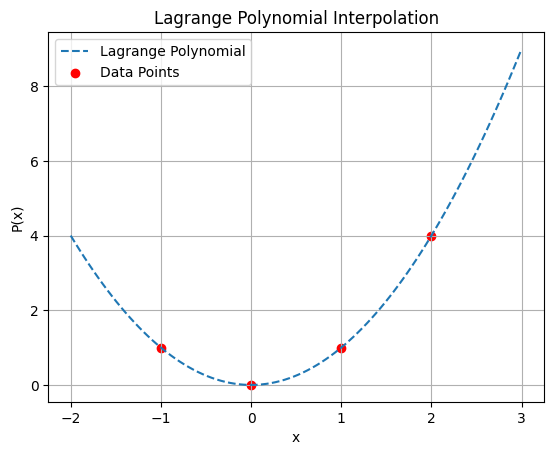

In [1]:
# Example 1: Basic Lagrange Interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define data points
x_points = np.array([-1, 0, 1, 2])
y_points = np.array([1, 0, 1, 4])

# Compute Lagrange interpolation polynomial
poly = lagrange(x_points, y_points)

# Generate values for plotting
x_vals = np.linspace(-2, 3, 100)
y_vals = poly(x_vals)

# Plot the interpolation
plt.plot(x_vals, y_vals, label='Lagrange Polynomial', linestyle='--')
plt.scatter(x_points, y_points, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.show()

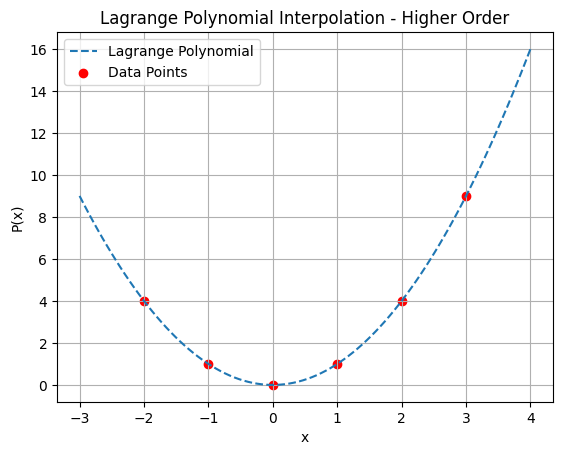

In [2]:
# Example 2: Higher-Order Interpolation

# Define new data points
x_points = np.array([-2, -1, 0, 1, 2, 3])
y_points = np.array([4, 1, 0, 1, 4, 9])

# Compute Lagrange interpolation polynomial
poly = lagrange(x_points, y_points)

# Generate values for plotting
x_vals = np.linspace(-3, 4, 100)
y_vals = poly(x_vals)

# Plot the interpolation
plt.plot(x_vals, y_vals, label='Lagrange Polynomial', linestyle='--')
plt.scatter(x_points, y_points, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.title('Lagrange Polynomial Interpolation - Higher Order')
plt.grid()
plt.show()


# Newton's Polynomial Interpolation

## Theory

Newton’s interpolation formula constructs a polynomial by using **divided differences**. The general form of the interpolation polynomial is:

$
P(x) = f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) + \dots + f[x_0, x_1, ..., x_n](x - x_0)(x - x_1) \dots (x - x_{n-1})
$

where **divided differences** are recursively computed as follows:

$
f[x_i, x_{i+1}] = \frac{f[x_{i+1}] - f[x_i]}{x_{i+1} - x_i}
$

For higher orders:

$
f[x_i, x_{i+1}, x_{i+2}] = \frac{f[x_{i+1}, x_{i+2}] - f[x_i, x_{i+1}]}{x_{i+2} - x_i}
$

The polynomial grows in complexity as more data points are added, but it allows for an **incremental update** rather than recomputing the entire polynomial.


In [3]:
# Example 1: Basic Newton's Interpolation
import sympy as sp

def newton_interpolation(x_vals, y_vals):
    n = len(x_vals)
    coef = np.zeros([n, n])  # Create a matrix to store divided differences
    coef[:, 0] = y_vals  # First column is y-values

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_vals[i+j] - x_vals[i])

    return coef[0]  # Return the first row (coefficients of Newton’s polynomial)

# Example data
x_points = np.array([1, 2, 3])
y_points = np.array([2, 3, 5])

# Compute Newton interpolation coefficients
coefficients = newton_interpolation(x_points, y_points)

# Construct Newton’s polynomial using SymPy
x = sp.Symbol('x')
n_poly = coefficients[0]
term = 1
for i in range(1, len(coefficients)):
    term *= (x - x_points[i-1])
    n_poly += coefficients[i] * term

sp.simplify(n_poly)  # Display the polynomial


0.5*x**2 - 0.5*x + 2.0

In [4]:
#Example 2: Newton's Interpolation with More Data Points

# Define new data points
x_points = np.array([-2, -1, 0, 1, 2, 3])
y_points = np.array([4, 1, 0, 1, 4, 9])

# Compute Newton interpolation coefficients
coefficients = newton_interpolation(x_points, y_points)

# Construct Newton’s polynomial using SymPy
x = sp.Symbol('x')
n_poly = coefficients[0]
term = 1
for i in range(1, len(coefficients)):
    term *= (x - x_points[i-1])
    n_poly += coefficients[i] * term

sp.simplify(n_poly)  # Display the polynomial


1.0*x**2

## Comparison of Lagrange and Newton Interpolation

| Feature                | Lagrange Interpolation          | Newton’s Interpolation           |
|------------------------|--------------------------------|----------------------------------|
| **Formula Type**       | Based on basis polynomials    | Based on divided differences    |
| **Computational Complexity** | \(O(n^2)\) | \(O(n^2)\), but can be updated efficiently |
| **Adding New Points**  | Requires recomputing entire polynomial | Can be updated incrementally |
| **Stability**          | Less numerically stable       | More stable for larger data sets |

### **Key Takeaways**
- **Lagrange interpolation** is easy to understand and implement but recomputing the polynomial for new points is expensive.
- **Newton’s interpolation** is more efficient when adding new data points because it reuses previous calculations.
- Both methods give the same polynomial, but **Newton’s method is generally preferred for large datasets**.
